In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # display all columns, without limits

In [2]:
# Load the dataset
order_items_df = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### **Missing Values**

In [3]:
order_items_df.isna().sum() # check for missing values

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### **Duplicate Values**

In [4]:
order_items_df.duplicated().sum() # check for duplicates

0

### **Unique Values**

In [5]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in order_items_df.columns :
    listItem.append([col, order_items_df[col].nunique(), order_items_df[col].sort_values().unique()])

df_uniques_per_column = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_uniques_per_column.sort_values('Number of Unique', ascending=False)

,Column Name,Number of Unique,Unique Sample
0,order_id,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4fc703e, 00024acbcdf0a6daa1e931b038114c75, 00042b26cf59d7ce69dfabb4e55b4fd9, 00048cc3ae777c65dbb7d2a0634bc1ea, 00054e8431b9d7675808bcb819fb4a32, 000576fe39319847cbb9d288c5617fa6, 0005a1a1728c9d785b8e2b08b904576c, 0005f50442cb953dcd1d21e1fb923495, 00061f2a7bc09da83e415a52dc8a4af1, 00063b381e2406b52ad429470734ebd5, 0006ec9db01a64e59a68b2c340bf65a7, 0008288aa423d2a3f00fcb17cd7d8719, 0009792311464db532ff765bf7b182ae, 0009c9a17f916a706d71784483a5d643, 000aed2e25dbad2f9ddb70584c5a2ded, 000c3e6612759851cc3cbb4b83257986, 000e562887b1f2006d75e0be9558292e, 000e63d38ae8c00bbcb5a30573b99628, 000e906b789b55f64edcb1f84030f90d, 000f25f4d72195062c040b12dce9a18a, 001021efaa8636c29475e7734483457d, 0010b2e5201cc5f1ae7e9c6cc8f5bd00, 00119ff934e539cf26f92b9ef0cdfed8, 0011d82c4b53e22e84023405fb467e57, 00125cb692d04887809806618a2a145f, 00130c0eee84a3d909e75bc08c5c3ca1, 0013503b13da1eac686219390b7d641b, 00137e170939bba5a3134e2386413108, 001427c0ec99cf8af737bd88e92fd444, 00143d0f86d6fbd9f9b38ab440ac16f5, 0014ae671de39511f7575066200733b7, 0015ebb40fb17286bea51d4607c4733c, 00169e31ef4b29deaae414f9a5e95929, 0016dfedd97fc2950e388d2971d718c7, 0017afd5076e074a48f1f1a4c7bac9c5, 001862358bf858722e1e2ae000cfed8b, 0019c29108428acffd089c36103c9440, 001ab0a7578dd66cd4b0a71f5b6e1e41, 001ac194d4a326a6fa99b581e9a3d963, 001b76dd48a5b1eee3e87778daa40df8, 001c85b5f68d2be0cb0797afc9e8ce9a, 001d8f0e34a38c37f7dba2a37d4eba8b, 001daeb0eddc45b999bad0801ad9d273, 001dbc16dc51075e987543d23a0507c7, 001e7ba991be1b19605ca0316e7130f9, 001e7cf2ad6bef3ade12ebc56ceaf0f3, 0020262c8a370bd5a174ea6a2a267321, 0020a222f55eb79a372d0efee3cca688, 002175704e8b209f61b9ad5cfd92b60e, 00229e4e43f7a7e0b9dd819ad43268d3, 0025081dcf9330f9a5052ae82c6ce396, 00254baeb6c932b0a8aeead91fbd02b5, 00259a44fcad3fc0474329e925d14fc3, 0025c5d1a8ca53a240ec2634bb4492ea, 002611a77fe03d076285fd4ca95db77c, 002691433f09002ac9ca0c4e8dbb8ead, 0026a368634b6e6f34f33b1499773a30, 00275bce676303c3bfd7292aefdfa223, 00276d5c3491fbf55305e26891040df9, 002834535f7a609a5c68266f173fa59e, 0028de0ca693a1bb26448916a81105cc, 002955b0acc63d04f6724a31967e82bd, 0029c5db35ef291ce99d1262012e7daa, 0029f17cf0e7640c5cb6825af681303f, 002af7fa9eb99d1456bceb6a13d6fc0b, 002b430ff89b3a24c31a1170acbbedea, 002b4e6fa42cd4a22cc86abc18fe9c05, 002c9def9c9b951b1bec6d50753c9891, 002d040018d12a3853c059f7f23ab5b1, 002f16b7bc4530031b7d90f791b12d8a, 002f19a65a2ddd70a090297872e6d64e, 002f98c0f7efd42638ed6100ca699b42, 0030d783f979fbc5981e75613b057344, 0030ff924c38549807645976adeef2c0, 00310b0c75bb13015ec4d82d341865a4, 00324b3eda39ba5ecce3945823e3594c, 0032d07457ae9c806c79368d7d9ce96b, 003324c70b19a16798817b2b3640e721, 00335b686d693c7d72deeb12f8e89227, 00335f75ea6a4455b524a8dd177067f5, 00337fe25a3780b3424d9ad7c5a4b35e, 003423b755b562962a6225a8de40d12e, 00345f338696283410b7977d2e3efc89, 0035246a40f520710769010f752e7507, 0035c0b07126fe9c24a325216fb96064, 0035e6b7ade84b3f5b86bd49814793df, 0036757472ece3dde52fd4bfd929c90e, 0036887767dea4bd43b1a88cd0d9477a, 00378c6c981f234634c0b9d6128df6dd, 003822434f91204da0a51fe4cf2aba18, 0039500db36d50d7d0bfaf23723550f3, 003a7f59d7e08a9c61d9e2881fe6459c, 003a94f778ef8cfd50247c8c1b582257, 003cc6161d7a2593f2525cce0c330d32, 003d0634280ff3d1d3a54459349a6899, 003d804eef0e1b856881cd18e0cc0d4c, 003d9fc84ad902adf2265248b5ffe1a4, 003edccf16bc5ec447f592913b3df2b4, ...]"
4,shipping_limit_date,93318,"[2016-09-19 00:15:34, 2016-09-19 23:11:33, 2016-10-08 10:34:01, 2016-10-08 10:45:33, 2016-10-08 13:26:12, 2016-10-08 13:46:32, 2016-10-08 13:47:45, 2016-10-08 14:09:08, 2016-10-08 14:27:50, 2016-10-08 14:46:49, 2016-10-09 02:45:17, 2016-10-09 02:46:18, 2016-10-09 03:08:28, 2016-10-09 03:10:31, 2016-10-09 03:10:59, 2016-10-09 03:11:34, 2016-10-09 03:45:42, 2016-10-09 17:06:52, 2016-10-10 02:46:24, 2016-10-10 03:07:51, 2016-10-10 03:10:34, 2016-10-10 07:45:48, 2016-10-10 07:46:47, 2016-10-10 11:43:2

### **Price**

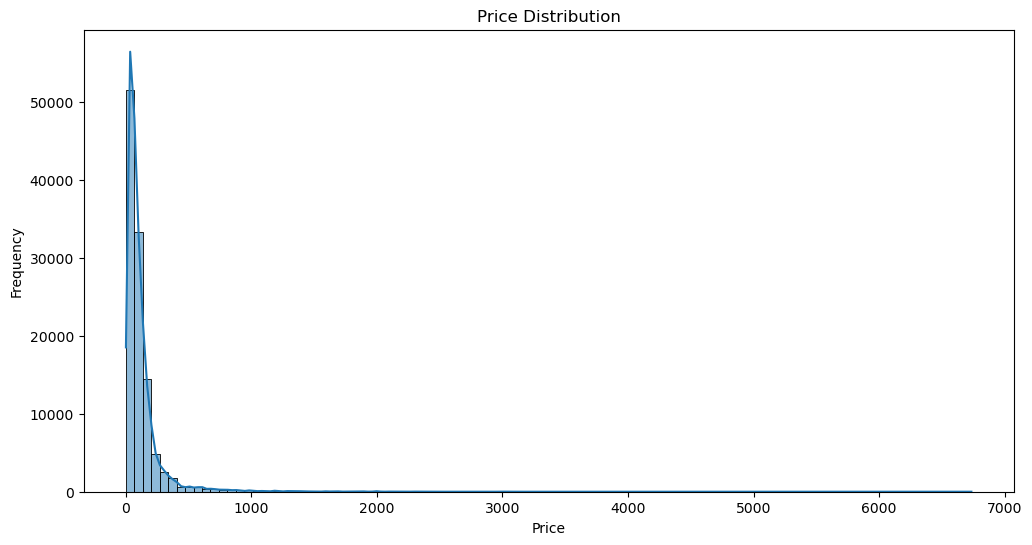

In [7]:
# histplot of the price column
plt.figure(figsize=(12, 6))
sns.histplot(order_items_df['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **Freight Value**

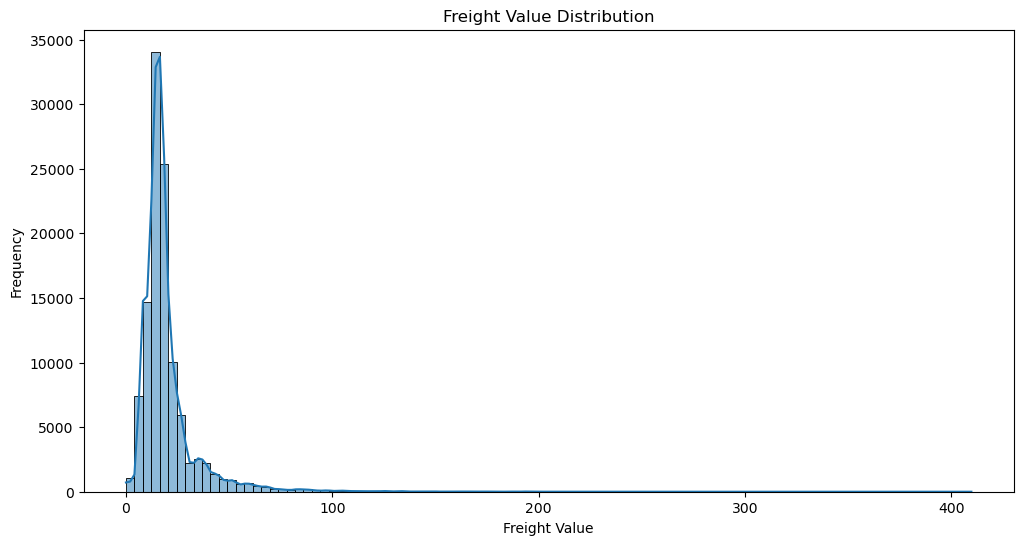

In [8]:
# histplot of the price column
plt.figure(figsize=(12, 6))
sns.histplot(order_items_df['freight_value'], bins=100, kde=True)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

### **Price vs Freight Value**

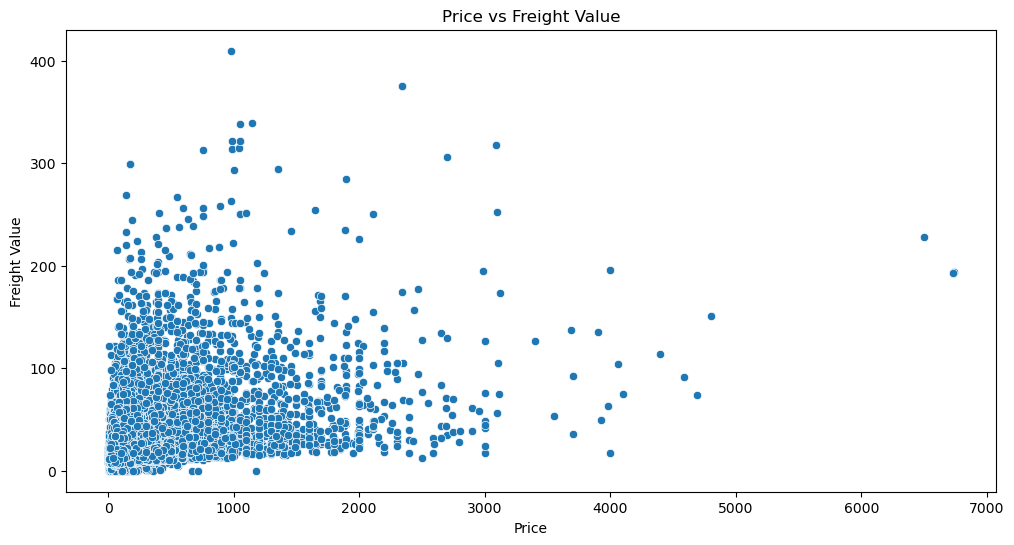

In [11]:
# scatterplot of price vs freight_value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=order_items_df, x='price', y='freight_value')
plt.title('Price vs Freight Value')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()